In [25]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, accuracy_score,cohen_kappa_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler



In [26]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Convert TotalCharges to numeric. 

In [29]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

There are many categorical features in the data set. Lets visualize them first then create dummy variables.

In [31]:
cat_cols = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ]

print(cat_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Visualize and Analyze Categorical Features

### Gender

In [28]:
gender_plot = df.groupby(['gender', 'Churn']).size().reset_index().pivot(columns='Churn', index='gender', values=0)
gender_plot#.plot(x=gender_plot.index, kind='bar', stacked=True);
#print('Gender', collections.Counter(df['gender']))

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


### Partner

In [27]:
partner_plot = df.groupby(['Partner', 'Churn']).size().reset_index().pivot(columns='Churn', index='Partner', values=0)
partner_plot#.plot(x=partner_plot.index, kind='bar', stacked=True);
#print('Partner', collections.Counter(df['Partner']))

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


### Dependents

Dependents Counter({'No': 4933, 'Yes': 2110})


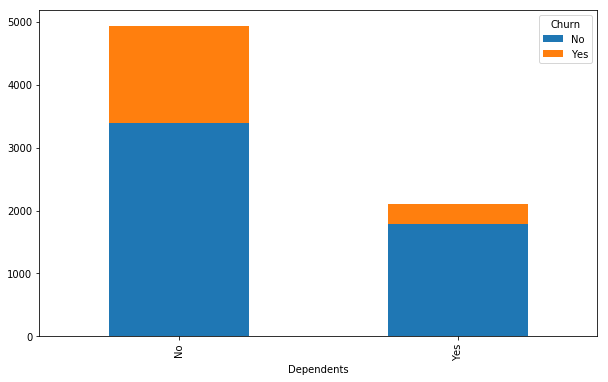

In [50]:
dependents_plot = df.groupby(['Dependents', 'Churn']).size().reset_index().pivot(columns='Churn', index='Dependents', values=0)
dependents_plot.plot(x=dependents_plot.index, kind='bar', stacked=True);
print('Dependents', collections.Counter(df['Dependents']))

Customers that have no dependents are more likely to churn than customers that have dependents. Interesting.

### PhoneService

PhoneService Counter({'Yes': 6361, 'No': 682})


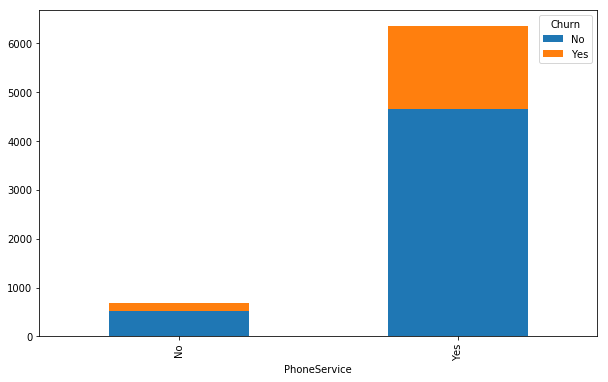

In [51]:
phoneservice_plot = df.groupby(['PhoneService', 'Churn']).size().reset_index().pivot(columns='Churn', index='PhoneService', values=0)
phoneservice_plot.plot(x=phoneservice_plot.index, kind='bar', stacked=True);
print('PhoneService', collections.Counter(df['PhoneService']))

### MultipleLines

MultipleLines Counter({'No': 3390, 'Yes': 2971, 'No phone service': 682})


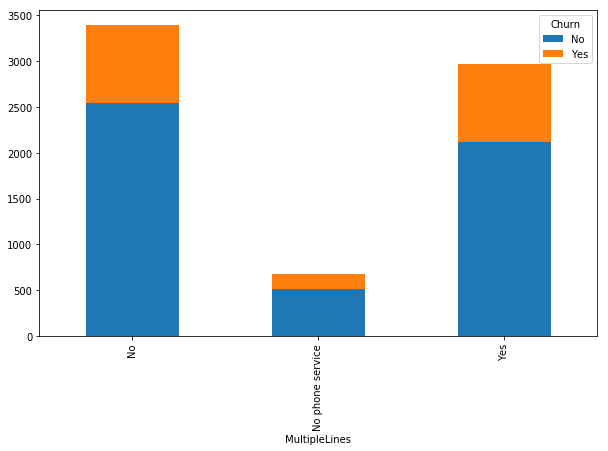

In [52]:
multiplelines_plot = df.groupby(['MultipleLines', 'Churn']).size().reset_index().pivot(columns='Churn', index='MultipleLines', values=0)
multiplelines_plot.plot(x=multiplelines_plot.index, kind='bar', stacked=True);
print('MultipleLines', collections.Counter(df['MultipleLines']))

### InternetService

InternetService Counter({'Fiber optic': 3096, 'DSL': 2421, 'No': 1526})


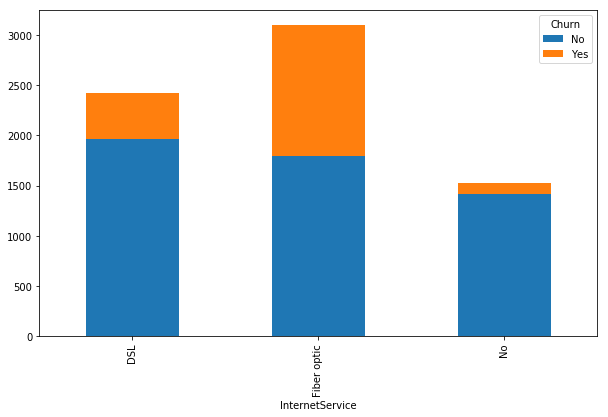

In [53]:
internetservice_plot = df.groupby(['InternetService', 'Churn']).size().reset_index().pivot(columns='Churn', index='InternetService', values=0)
internetservice_plot.plot(x=internetservice_plot.index, kind='bar', stacked=True);
print('InternetService', collections.Counter(df['InternetService']))

### OnlineSecurity

OnlineSecurity Counter({'No': 3498, 'Yes': 2019, 'No internet service': 1526})


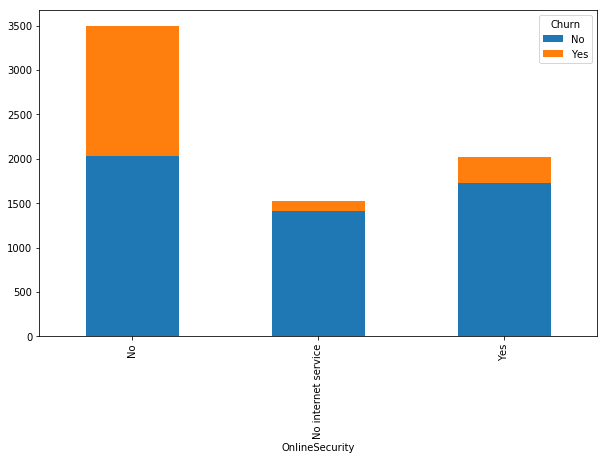

In [54]:
onlinesecurity_plot = df.groupby(['OnlineSecurity', 'Churn']).size().reset_index().pivot(columns='Churn', index='OnlineSecurity', values=0)
onlinesecurity_plot.plot(x=onlinesecurity_plot.index, kind='bar', stacked=True);
print('OnlineSecurity', collections.Counter(df['OnlineSecurity']))

### OnlineBackup

OnlineBackup Counter({'No': 3088, 'Yes': 2429, 'No internet service': 1526})


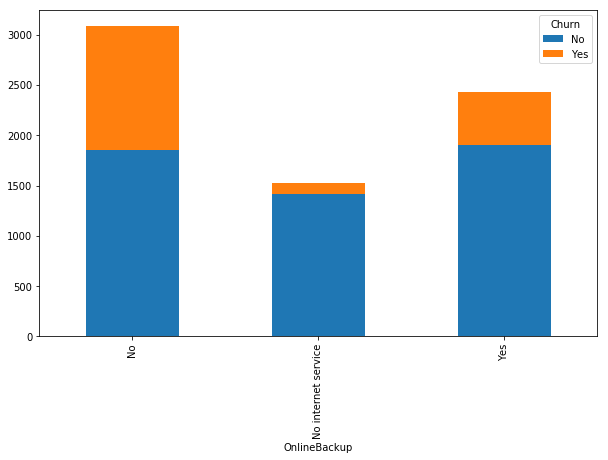

In [55]:
onlinebackup_plot = df.groupby(['OnlineBackup', 'Churn']).size().reset_index().pivot(columns='Churn', index='OnlineBackup', values=0)
onlinebackup_plot.plot(x=onlinebackup_plot.index, kind='bar', stacked=True);
print('OnlineBackup', collections.Counter(df['OnlineBackup']))

### DeviceProtection

DeviceProtection Counter({'No': 3095, 'Yes': 2422, 'No internet service': 1526})


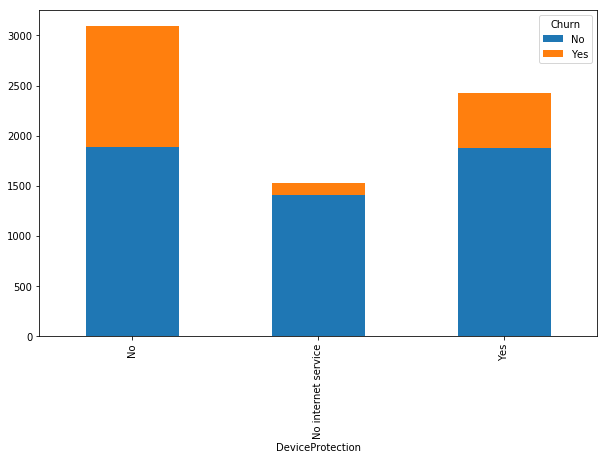

In [56]:
deviceprotection_plot = df.groupby(['DeviceProtection', 'Churn']).size().reset_index().pivot(columns='Churn', index='DeviceProtection', values=0)
deviceprotection_plot.plot(x=deviceprotection_plot.index, kind='bar', stacked=True);
print('DeviceProtection', collections.Counter(df['DeviceProtection']))

### TechSupport

TechSupport Counter({'No': 3473, 'Yes': 2044, 'No internet service': 1526})


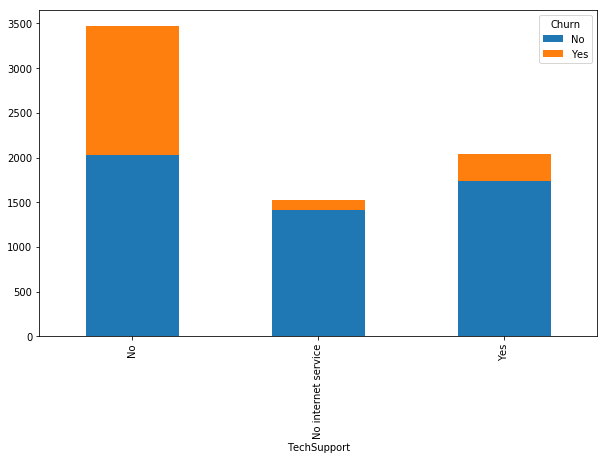

In [57]:
techsupport_plot = df.groupby(['TechSupport', 'Churn']).size().reset_index().pivot(columns='Churn', index='TechSupport', values=0)
techsupport_plot.plot(x=techsupport_plot.index, kind='bar', stacked=True);
print('TechSupport', collections.Counter(df['TechSupport']))

TechSupport seems to be an important factor for churn.

### StreamingTV

StreamingTV Counter({'No': 2810, 'Yes': 2707, 'No internet service': 1526})


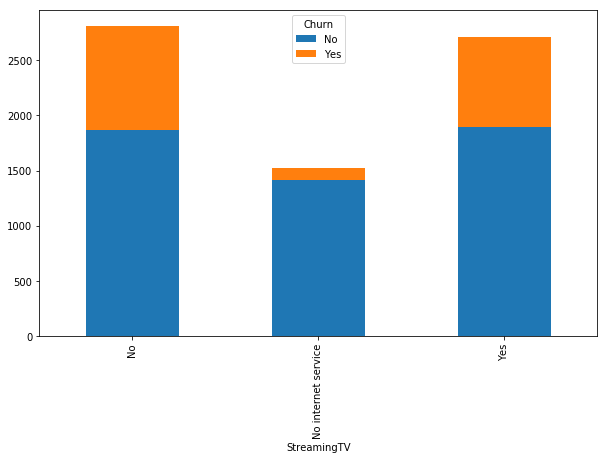

In [58]:
streamingtv_plot = df.groupby(['StreamingTV', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingTV', values=0)
streamingtv_plot.plot(x=streamingtv_plot.index, kind='bar', stacked=True);
print('StreamingTV', collections.Counter(df['StreamingTV']))

### StreamingMovies

StreamingMovies Counter({'No': 2785, 'Yes': 2732, 'No internet service': 1526})


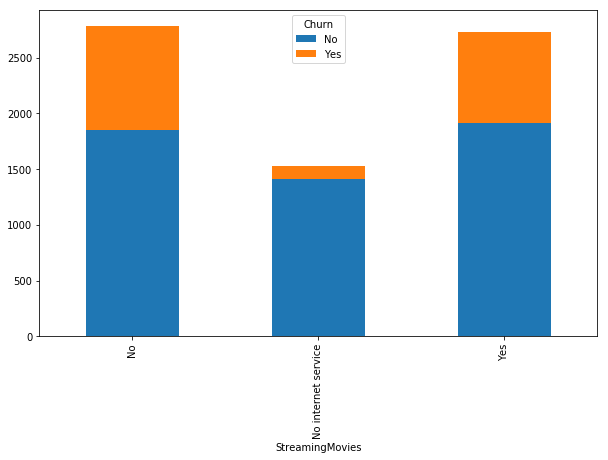

In [59]:
streamingmovies_plot = df.groupby(['StreamingMovies', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingMovies', values=0)
streamingmovies_plot.plot(x=streamingmovies_plot.index, kind='bar', stacked=True);
print('StreamingMovies', collections.Counter(df['StreamingMovies']))

### Contract

Contract Counter({'Month-to-month': 3875, 'Two year': 1695, 'One year': 1473})


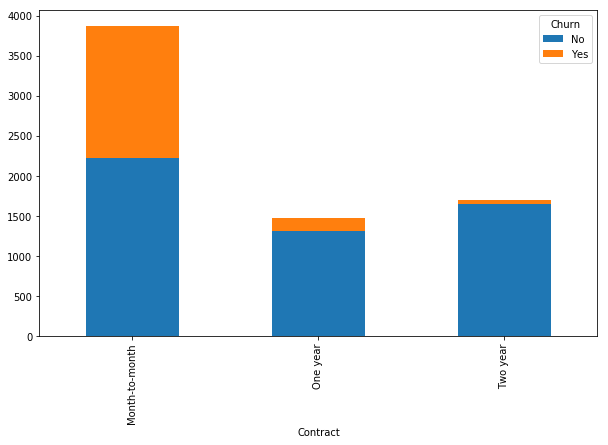

In [60]:
contract_plot = df.groupby(['Contract', 'Churn']).size().reset_index().pivot(columns='Churn', index='Contract', values=0)
contract_plot.plot(x=contract_plot.index, kind='bar', stacked=True);
print('Contract', collections.Counter(df['Contract']))

It is so obvious that contract term does have an effect on churn. There were very few churns when customers have a two-year contract. And most churns occurred on customers with a month-to-month contract.

### PaperlessBilling

PaperlessBilling Counter({'Yes': 4171, 'No': 2872})


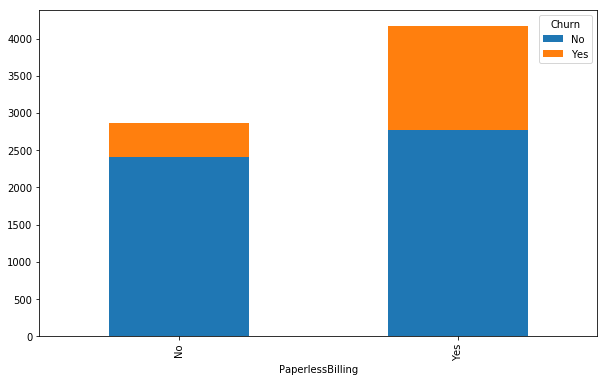

In [61]:
paperlessbilling_plot = df.groupby(['PaperlessBilling', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaperlessBilling', values=0)
paperlessbilling_plot.plot(x=paperlessbilling_plot.index, kind='bar', stacked=True);
print('PaperlessBilling', collections.Counter(df['PaperlessBilling']))

### PaymentMethod

PaymentMethod Counter({'Electronic check': 2365, 'Mailed check': 1612, 'Bank transfer (automatic)': 1544, 'Credit card (automatic)': 1522})


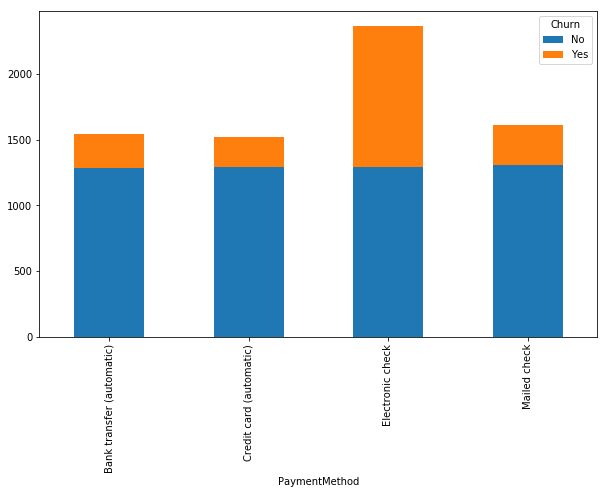

In [62]:
paymentmethod_plot = df.groupby(['PaymentMethod', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaymentMethod', values=0)
paymentmethod_plot.plot(x=paymentmethod_plot.index, kind='bar', stacked=True);
print('PaymentMethod', collections.Counter(df['PaymentMethod']))

PaymentMethod does have an effect on churn, in particular, pay by electronic check has the highest percentage churning rate.

### SeniorCitizen

SeniorCitizen Counter({0: 5901, 1: 1142})


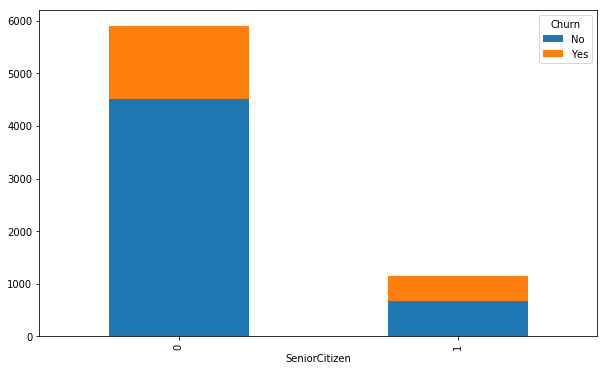

In [63]:
seniorcitizen_plot = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index().pivot(columns='Churn', index='SeniorCitizen', values=0)
seniorcitizen_plot.plot(x=seniorcitizen_plot.index, kind='bar', stacked=True);
print('SeniorCitizen', collections.Counter(df['SeniorCitizen']))

We do not have many senior citizens in the data.

## Explore Numeric Features

### Tenure

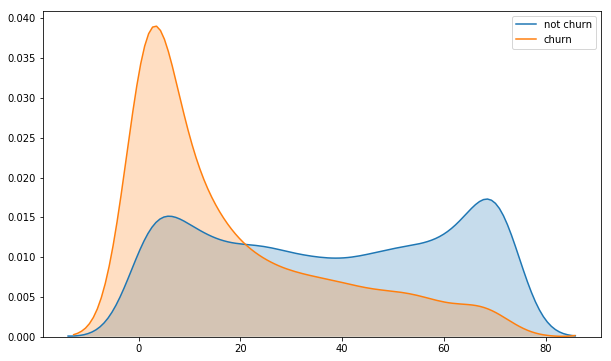

In [64]:
sns.kdeplot(df['tenure'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['tenure'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

In [44]:
df['tenure'].loc[df['Churn'] == 'No'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

In [45]:
df['tenure'].loc[df['Churn'] == 'Yes'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

Not churned customers have a much longer average tenure (20 months) than the churned customers. Makes sense.

### Monthly Charges

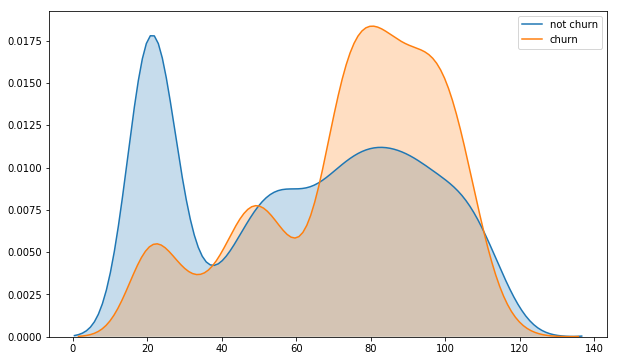

In [67]:
sns.kdeplot(df['MonthlyCharges'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['MonthlyCharges'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

In [68]:
df['MonthlyCharges'].loc[df['Churn'] == 'No'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [69]:
df['MonthlyCharges'].loc[df['Churn'] == 'Yes'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

Churned customers paid over 20% higher on average monthly fee than non-churned customers. Money talks. 

### Total Charges

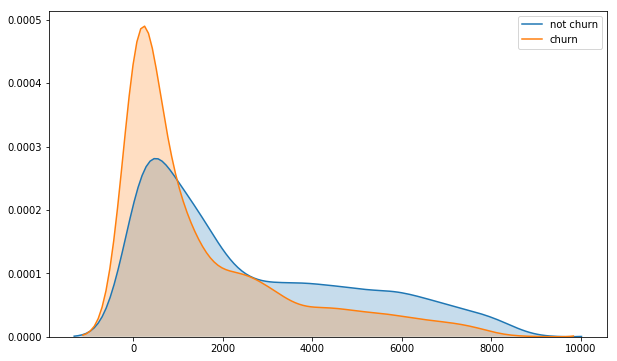

In [71]:
sns.kdeplot(df['TotalCharges'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['TotalCharges'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

### Encode labels with value between 0 and 1.

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Churn'] = le.fit_transform(df.Churn.values)

Fill nan with mean of the column

In [33]:
df = df.fillna(df.mean())

### Encode categorical features

In [34]:
categorical =  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for f in categorical:
    dummies = pd.get_dummies(df[f], prefix = f, prefix_sep = '_')
    df = pd.concat([df, dummies], axis = 1)
# drop original categorical features
df.drop(categorical, axis = 1, inplace = True)

### Autoencoder

In [35]:
df.head(3)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [36]:
df.shape

(7043, 47)

C:\Users\kiran kumar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\kiran kumar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



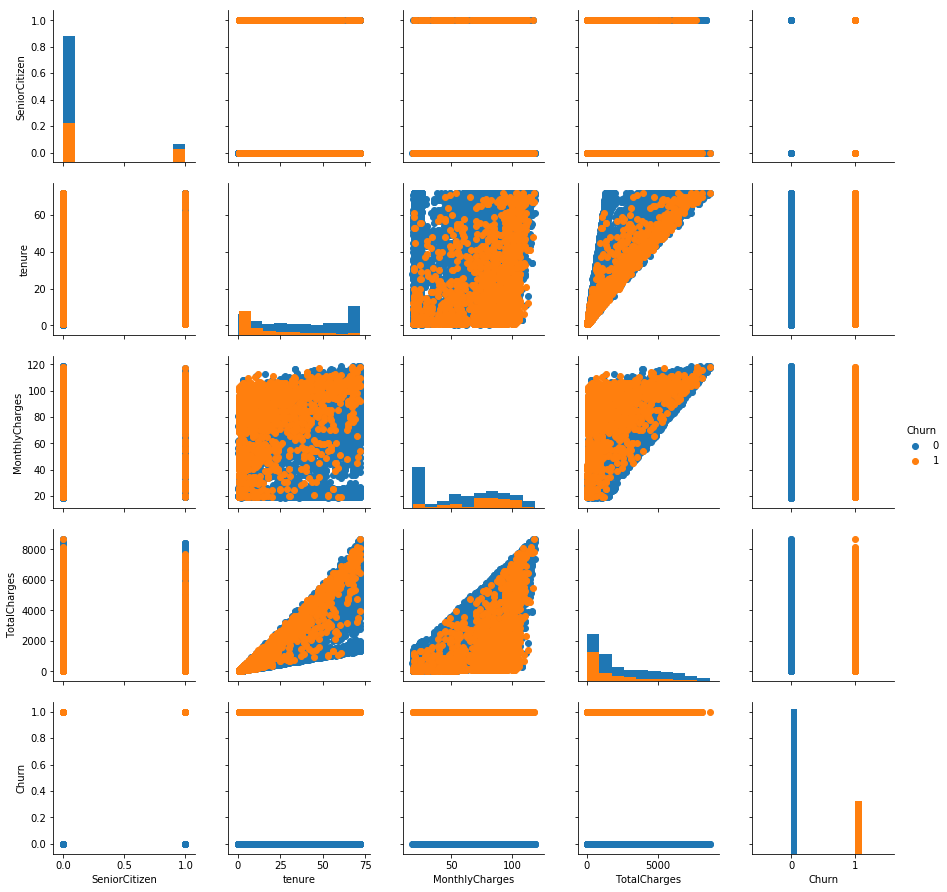

In [11]:
g = sns.PairGrid(df, hue="Churn")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [37]:
X = df.drop(columns = ['customerID','Churn'],axis = 1)
sc = StandardScaler()
X_scalar = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
y = df['Churn']

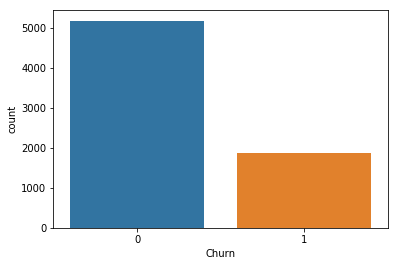

In [38]:
sns.countplot(y)

plt.show()

In [39]:
## Over Sampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [40]:
x_resmaple,y_resample = SMOTE().fit_resample(X_scalar,y)

In [41]:
np.savez('spam.npz',x_resmaple,y_resample)

In [42]:
df_over = np.load('spam.npz')
df_over.files

['arr_0', 'arr_1']

In [43]:
x_over = df_over['arr_0']
y_over = df_over['arr_1']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.25, random_state=0)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape, df.shape)

(7761, 45) (2587, 45) (7761,) (2587,) (7043, 47)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,
                             ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


### Logistic Regression

In [46]:
lr = LogisticRegression().fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)



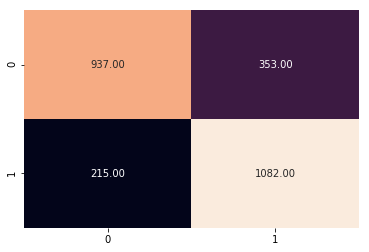

In [47]:
cm = confusion_matrix(y_test,y_pred_lr)

sns.heatmap(cm, annot = True, fmt = '.2f',cbar = False)

In [48]:
cr = classification_report(y_test,y_pred_lr)

print(cr)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1290
           1       0.75      0.83      0.79      1297

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587



In [49]:
kappa_lr = cohen_kappa_score(y_test,y_pred_lr)
print('Kappa Score for :', kappa_lr)



Kappa Score for : 0.5607513121417729


### Decision Tree

In [50]:
tree = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)


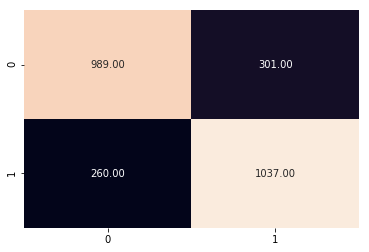

In [51]:
cm = confusion_matrix(y_test,y_pred_tree)

sns.heatmap(cm, annot = True, fmt = '.2f', cbar = False)

In [52]:
cr = classification_report(y_test,y_pred_tree)

print(cr)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1290
           1       0.78      0.80      0.79      1297

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587



In [53]:
kappa_tree = cohen_kappa_score(y_test,y_pred_tree)
print('Kappa Score for :', kappa_tree)



Kappa Score for : 0.5662526266649492


### Random Forest

In [54]:
rf = RandomForestClassifier().fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

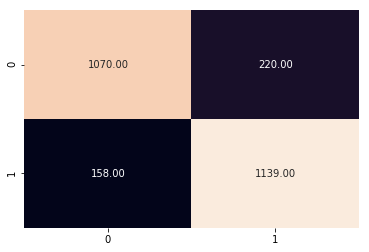

In [55]:
cm = confusion_matrix(y_test,y_pred_rf)

sns.heatmap(cm, annot = True, fmt = '.2f', cbar = False)

In [56]:
cr = classification_report(y_test,y_pred_rf)

print(cr)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1290
           1       0.84      0.88      0.86      1297

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [57]:
kappa_rf = cohen_kappa_score(y_test,y_pred_rf)
print('Kappa Score for :', kappa_rf)



Kappa Score for : 0.7077295711133813


### Ada Boosting

In [58]:
ada = AdaBoostClassifier().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

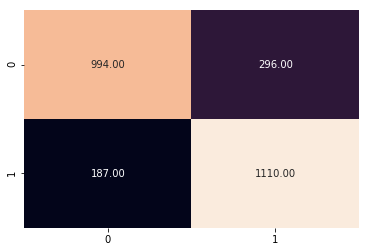

In [59]:
cm = confusion_matrix(y_test,y_pred_ada)

sns.heatmap(cm, annot = True, fmt = '.2f', cbar = False)

In [60]:
cr = classification_report(y_test,y_pred_ada)

print(cr)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1290
           1       0.79      0.86      0.82      1297

    accuracy                           0.81      2587
   macro avg       0.82      0.81      0.81      2587
weighted avg       0.82      0.81      0.81      2587



In [61]:
kappa_ada = cohen_kappa_score(y_test,y_pred_ada)
print('Kappa Score for :', kappa_ada)



Kappa Score for : 0.6265066147122536


### Naivy Base

In [62]:
bayes = GaussianNB().fit(X_train,y_train)
y_pred_bayes = bayes.predict(X_test)

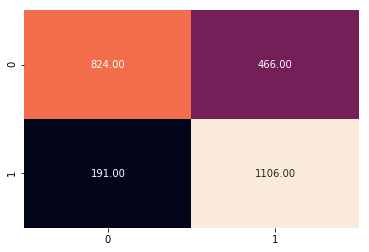

In [63]:
cm = confusion_matrix(y_test,y_pred_bayes)

sns.heatmap(cm, annot = True, fmt = '.2f', cbar = False)

In [64]:
cr = classification_report(y_test,y_pred_bayes)

print(cr)

              precision    recall  f1-score   support

           0       0.81      0.64      0.71      1290
           1       0.70      0.85      0.77      1297

    accuracy                           0.75      2587
   macro avg       0.76      0.75      0.74      2587
weighted avg       0.76      0.75      0.74      2587



In [65]:
kappa_bayes = cohen_kappa_score(y_test,y_pred_bayes)
print('Kappa Score for :', kappa_bayes)



Kappa Score for : 0.49177968116232373


### Grid Search CV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
tuned_parameter = [{'n_estimators':[10,20,30],
                   'criterion':['gini','entropy'],
                   'max_depth':[10,15],
                   'max_features':['sqrt','log2']}]

In [74]:
clf = GridSearchCV(rf,param_grid = tuned_parameter,cv = 10,
                   scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [75]:
y_prob_clf = clf.predict_proba(X_test)
y_pred_clf = clf.predict(X_test)

Text(24.0, 0.5, 'True Values')

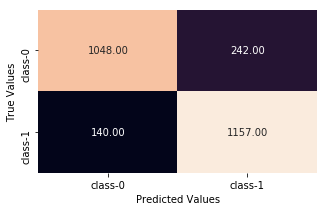

In [76]:
cm = confusion_matrix(y_test,y_pred_clf)
plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['class-0','class-1'],
           yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [77]:
cr = classification_report(y_test,y_pred_clf)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1290
           1       0.83      0.89      0.86      1297

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [78]:
kappa = cohen_kappa_score(y_test,y_pred_clf) # Kappa Score
print('Kappa Score =',kappa)

Kappa Score = 0.7046120423990583


In [79]:
extra = ExtraTreesClassifier().fit(X_train,y_train)

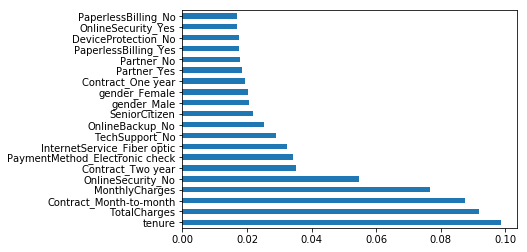

In [82]:
feat_imp = pd.Series(extra.feature_importances_, index = X_scalar.columns)
feat_imp.nlargest(20).plot(kind = 'barh')
plt.show()

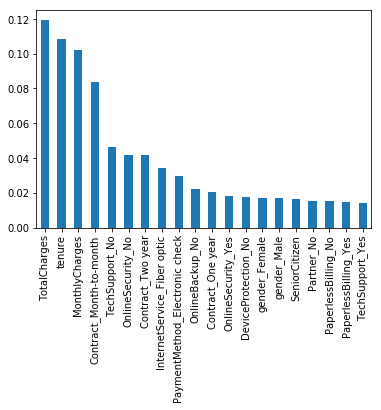

In [84]:
feat_imp_rf = pd.Series(rf.feature_importances_, index = X_scalar.columns)
feat_imp_rf.nlargest(20).plot(kind = 'bar')
plt.show()